<a href="https://colab.research.google.com/github/nagelex/kaaglespam1/blob/main/sms_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/spam.csv', encoding = 'ISO-8859-1')

In [ ]:
df1 = df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis = 1)
#preprocessing steps
df1 = df1.rename( columns={"v1": "labels", "v2": "text"})
df1['text'] = df1['text'].str.replace("[^a-zA-Z0-9\s]", "")


<ipython-input-59-6102f078cf1e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['text'] = df1['text'].str.replace("[^a-zA-Z0-9\s]", "")


In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df1['text'] = df1['text'].str.lower()
df1["text"] = df1["text"].apply(word_tokenize) #used to devide text  into subunites
stop_words = set(stopwords.words("english"))  #words such as "is" "and" - in order to delete them in next step
df1["text"] = df1["text"].apply(lambda x: [word for word in x if word not in stop_words])
df1["text"] = df1["text"].apply(lambda x: " ".join(x))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
import sklearn

In [ ]:
df1.describe()

,labels,text
count,5572,5572
unique,2,5113
top,ham,sorry ill call later
freq,4825,30


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df1['text'])
y = df1[['labels']]

df_transformed = df.copy()

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, balanced_accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


clf= SVC()
clf.fit (X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9739910313901345
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



array([[964,   1],
       [ 28, 122]])

In [74]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf2= MultinomialNB()
clf2.fit (X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9739910313901345
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       965
        spam       0.90      0.91      0.90       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "sms_SVC.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(clf, file)

model_pkl_file = "sms_MNB.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(clf2, file)

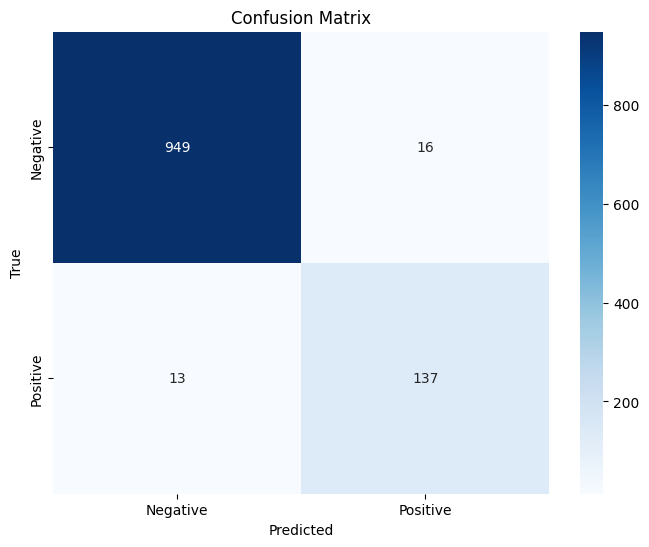

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()